In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=np.linspace(-5,5,100)
y=0.5*x + 3

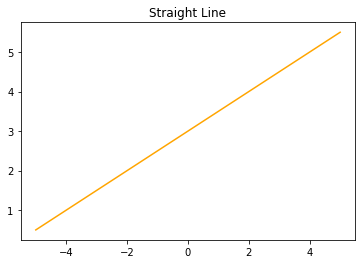

In [6]:
plt.plot(x,y,c='orange')
plt.title('Straight Line')
plt.show()


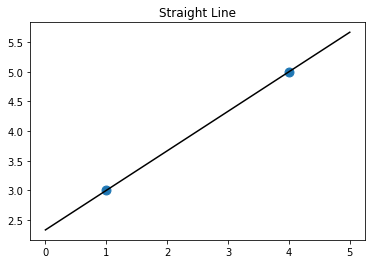

In [8]:
from sklearn.linear_model import LinearRegression
X=[[1],[4]]
y=[3,5]
lr=LinearRegression()
lr.fit(X,y)
z=np.linspace(0,5,20)
plt.scatter(X,y,s=80)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')
plt.show()

In [10]:
lr.coef_
lr.intercept_

2.333333333333334

In [11]:
print('y = {:.3f}'.format(lr.coef_[0]),'x','+ {:.3f}'.format(lr.intercept_))


y = 0.667 x + 2.333


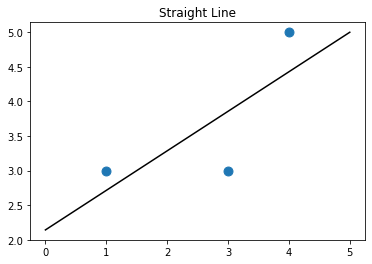

In [12]:
X=[[1],[4],[3]]
y=[3,5,3]
lr=LinearRegression().fit(X,y)
z=np.linspace(0,5,20)
plt.scatter(X,y,s=80)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')
plt.show()

In [14]:
a=np.linspace(0,5,5)
b=a.reshape(-1,1)

## 糖尿病线性回归

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y=load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

In [3]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5303814759709331
0.4593440496691641


In [4]:
# L2 岭回归
from sklearn.linear_model import Ridge
rigde = Ridge().fit(X_train, y_train)
print(rigde.score(X_train, y_train))
print(rigde.score(X_test, y_test))

0.4326376676137663
0.4325217769068189


In [6]:
# 调参
from sklearn.linear_model import Ridge
rigde10 = Ridge(alpha=10).fit(X_train, y_train)
print(rigde10.score(X_train, y_train))
print(rigde10.score(X_test, y_test))

0.15119962367011153
0.16202013428866247


In [7]:
# 调参
from sklearn.linear_model import Ridge
rigde01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(rigde01.score(X_train, y_train))
print(rigde01.score(X_test, y_test))

0.5215646055241339
0.4734019500945311


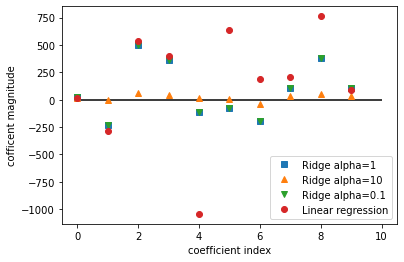

In [13]:
import matplotlib.pyplot as plt
plt.plot(rigde.coef_, 's', label = 'Ridge alpha=1')
plt.plot(rigde10.coef_, '^', label = 'Ridge alpha=10')
plt.plot(rigde01.coef_, 'v', label = 'Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label = 'Linear regression')
plt.xlabel('coefficient index')
plt.ylabel('cofficent magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.legend()

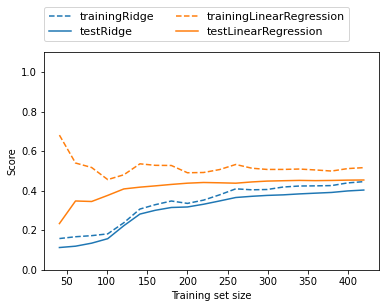

In [15]:
from sklearn.model_selection import learning_curve,KFold
import numpy as np
def plot_learning_curve(est, X, y):
    training_set_size, train_score, test_score = learning_curve(est,X,y,train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True,
                                                                        random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_score.mean(axis=1), '--', label='training' + estimator_name)
    plt.plot(training_set_size, test_score.mean(axis=1), '-', label = 'test' + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
plot_learning_curve(Ridge(alpha=1),X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0,1.05), ncol=2, fontsize=11)

## 第五章 朴素贝叶斯

In [6]:
import numpy as np
X = np.array([[0,1,0,1],[1,1,1,0],[0,1,1,0],[0,0,0,1],[0,1,1,0],[0,1,0,1],[1,0,0,1]])
y = np.array([0,1,1,0,1,0,0])
counts={}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('feature counts:\n{}'.format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=8)
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
print('模型得分：{:.3f}'.format(nb.score(X_test,y_test)))

模型得分：0.544


In [2]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('模型得分：{:.3f}'.format(gnb.score(X_test,y_test)))

模型得分：0.968


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
print('训练数据模型得分：{:.3f}'.format(mnb.score(X_train_scaled,y_train)))
print('测试数据模型得分：{:.3f}'.format(mnb.score(X_test_scaled,y_test)))

训练数据模型得分：0.397
测试数据模型得分：0.320


No handles with labels found to put in legend.


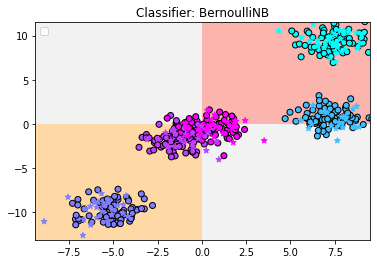

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=nb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: BernoulliNB')
plt.legend()
plt.show()

No handles with labels found to put in legend.


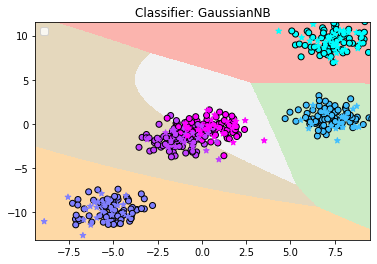

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: GaussianNB')
plt.show()


No handles with labels found to put in legend.


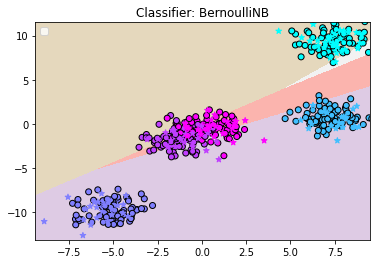

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=mnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: BernoulliNB')
plt.legend()
plt.show()

## 朴素贝叶斯实战 -- 判断肿瘤是良性还是恶性

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer['target_names'])
print(cancer['feature_names'])
X, y = cancer.data,cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=8)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
print(cancer.data.shape)
print(X_train.data.shape)
print(X_test.data.shape)

(569, 30)
(426, 30)
(143, 30)


In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('训练数据模型得分：{:.3f}'.format(gnb.score(X_train,y_train)))
print('测试数据模型得分：{:.3f}'.format(gnb.score(X_test,y_test)))

训练数据模型得分：0.948
测试数据模型得分：0.937


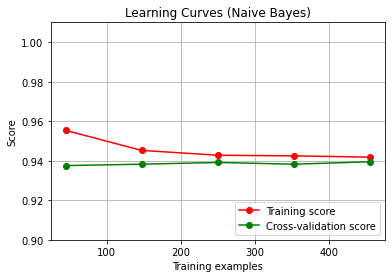

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1,train_size=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_size)
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='lower right')
    return plt
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator,title,X,y,ylim=(0.9, 1.01), cv=cv, n_jobs=4)
plt.show()

## 决策树

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
a=wine.data
b=a[:,:3]
c=a[:,:3]
print(type(a))

<class 'numpy.ndarray'>


In [42]:
# 树深度为1
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

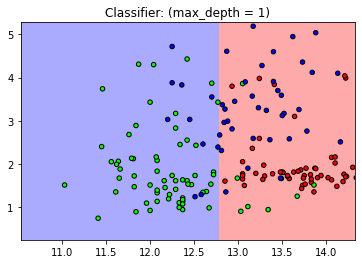

In [43]:
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=clf.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: (max_depth = 1)')
plt.show()

In [45]:
# 树深度为3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

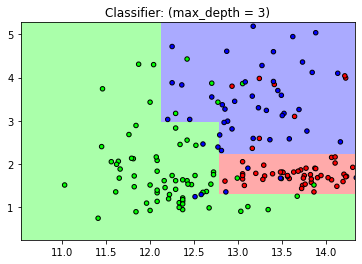

In [46]:
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=clf.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: (max_depth = 3)')
plt.show()


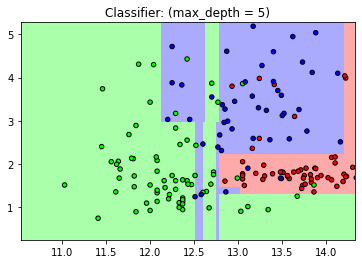

In [47]:
# 树深度为5
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=clf.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: (max_depth = 5)')
plt.show()


In [61]:
# 打印树结构
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf,out_file='wine.dot', class_names=wine.target_names,
                feature_names=wine.feature_names[:2], impurity=False, filled=True)
with open('wine.dot') as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)
# graph = graphviz.Source(dot_data)

In [63]:
# 生成图像
 # dot -Tpng wine.dot -o wine.png

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="alcohol <= 12.78\\nsamples = 133\\nvalue = [37, 55, 41]\\nclass = class_1", fillcolor="#e1fbec"] ;\n1 [label="malic_acid <= 2.96\\nsamples = 58\\nvalue = [0, 48, 10]\\nclass = class_1", fillcolor="#62ea9b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="alcohol <= 12.49\\nsamples = 46\\nvalue = [0, 43, 3]\\nclass = class_1", fillcolor="#47e78a"] ;\n1 -> 2 ;\n3 [label="samples = 39\\nvalue = [0, 39, 0]\\nclass = class_1", fillcolor="#39e581"] ;\n2 -> 3 ;\n4 [label="alcohol <= 12.59\\nsamples = 7\\nvalue = [0, 4, 3]\\nclass = class_1", fillcolor="#cef8e0"] ;\n2 -> 4 ;\n5 [label="samples = 2\\nvalue = [0, 0, 2]\\nclass = class_2", fillcolor="#8139e5"] ;\n4 -> 5 ;\n6 [label="alcohol <= 12.745\\nsamples = 5\\nvalue = [0, 4, 1]\\nclass = class_1", fillcolor="#6aeca0"] ;\n4 -> 6 ;\n7 [label="samples = 4\\nvalue = [0, 4, 0]\\nclass = class_1", fillcolor="#39e581"] ;\n6 -> 7 ;\n8 [label="s

## 使用随机深林对酒进行分类

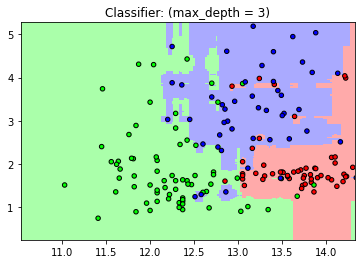

In [64]:
from sklearn.ensemble import RandomForestClassifier
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min, x_max = X[:,0].min() - 0.5,X[:,0].max() - 0.5
y_min, y_max = X[:,1].min() - 0.5,X[:,1].max() - 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max, .02))
z=forest.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: (max_depth = 3)')
plt.show()


In [68]:
y_pred=forest.predict(X_test)
print(y_pred)
#模型校验
print("model in trains set score is:",forest.score(X_train,y_train))
print("model in tests set score is:",forest.score(X_test,y_test))
#mae\mse\r2
from  sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print("mae:",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

[2 1 2 2 0 1 2 2 2 1 0 0 0 1 0 1 0 0 2 1 0 1 1 1 1 0 0 1 2 0 1 2 0 0 2 2 0
 1 0 1 1 2 0 0 2]
model in trains set score is: 1.0
model in tests set score is: 0.7777777777777778
mae: 0.28888888888888886
mse 0.4222222222222222
r2 0.375912408759124
